# **Netflix Data Analysis Project**

## **Problem Statement**
Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.

The specific problem to be addressed in this project is **Content Trends Analysis for Strategic Recommendations**. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.


#  **Step 1: Load the dataset**
In this step, we import the required Python libraries and load the Netflix dataset.
- `pandas` is used for data handling and analysis.
- `matplotlib` is used for visualization (charts).
We will first check the shape (rows × columns) of the dataset and preview the first few records.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Netflix Dataset.csv")
print("Shape of dataset:", df.shape)

Shape of dataset: (7789, 11)


In [5]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#  **Step 2: Data Cleaning & Preprocessing**
Raw datasets usually need cleaning before analysis. Here we:
- Standardize column names.
- Extract the year from the `Release_Date`.
- Create clean columns for Type (Movie/TV Show), Genre, and Country.
- Replace blank or invalid values with proper `NaN` (missing values).
This ensures our data is consistent and ready for analysis.


In [6]:
df.columns = [c.strip() for c in df.columns]
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df['Type'] = df['Category'].astype(str).str.strip()
df['Genres'] = df['Category'].astype(str).str.strip()
df['Country'] = df['Country'].astype(str).str.strip()
df.replace({'': pd.NA, 'None': pd.NA, 'nan': pd.NA, 'NaN': pd.NA}, inplace=True)

#  **Step 3: Movies vs TV Shows by Year**
In this step, we analyze how the number of Movies and TV Shows on Netflix has changed over the years.
- We group data by `Year` and `Type`.
- Then, we create a stacked bar chart to visually compare Movies vs TV Shows across time.


Type,Movie,TV Show
Year,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0


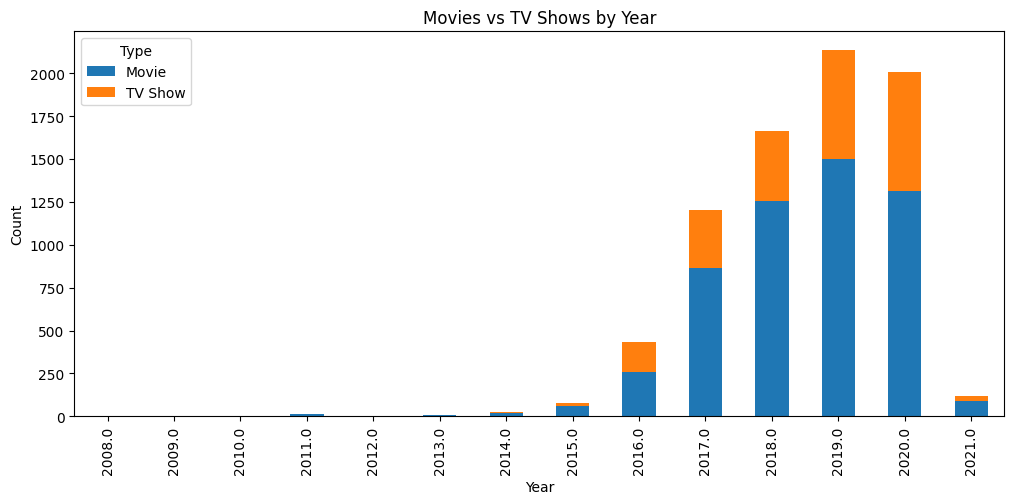

In [7]:
df_type_year = df.dropna(subset=['Type','Year']).groupby(['Year','Type']).size().unstack(fill_value=0)
display(df_type_year.head())

df_type_year.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title('Movies vs TV Shows by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#  **Step 4: Most Common Genres**
Here, we find the most popular genres overall.
- We split multiple genres listed for a single title into separate entries.
- Then, we count the frequency of each genre.
- Finally, we plot the top 15 genres in a horizontal bar chart.


Genre
Movie      5379
TV Show    2410
Name: count, dtype: int64


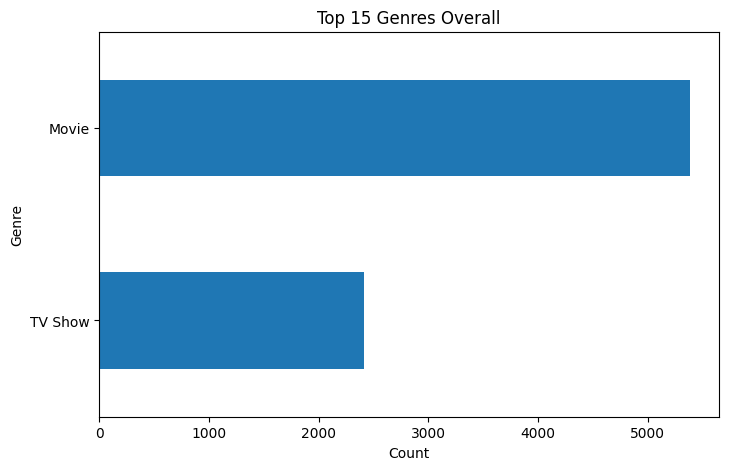

In [8]:
genres_exploded = df[['Genres','Year']].dropna(subset=['Genres']).copy()
genres_exploded['Genres_list'] = genres_exploded['Genres'].str.split(',').apply(lambda lst: [g.strip() for g in lst])
genres_exploded = genres_exploded.explode('Genres_list').rename(columns={'Genres_list':'Genre'})

top_genres = genres_exploded['Genre'].value_counts().head(15)
print(top_genres)

top_genres.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Top 15 Genres Overall')
plt.xlabel('Count')
plt.show()

#  **Step 5: Genre Trends Over Time**
Genres change in popularity over time. For example, some genres like 'Documentaries' may increase while others decline.
- We focus on the top 6 genres.
- We group them by year.
- We use a line plot to see how each genre has grown or declined.


Genre,Movie,TV Show
Year,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0


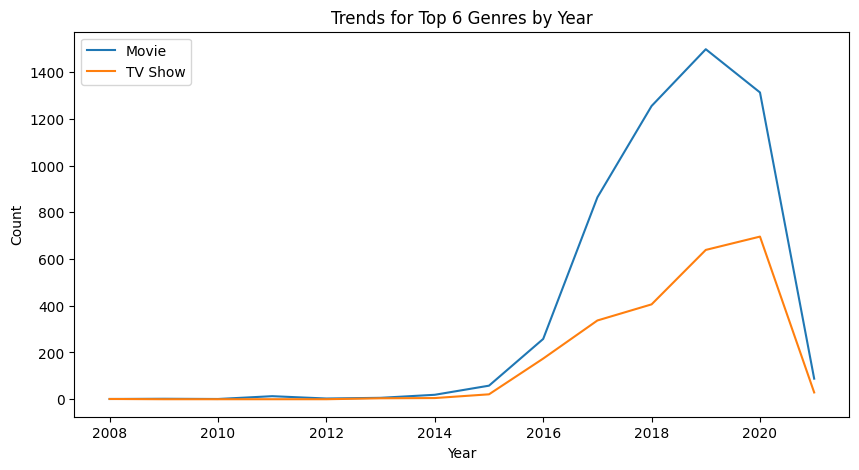

In [9]:
top6 = top_genres.head(6).index.tolist()
genre_trends = genres_exploded[genres_exploded['Genre'].isin(top6)].groupby(['Year','Genre']).size().unstack(fill_value=0)
display(genre_trends.head())

plt.figure(figsize=(10,5))
for g in top6:
    plt.plot(genre_trends.index, genre_trends[g], label=g)
plt.legend()
plt.title('Trends for Top 6 Genres by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#  **Step 6: Top Countries**
Netflix content comes from many countries. Some countries dominate production while others are underrepresented.
- We split multiple countries per title.
- Count how many titles each country has contributed.
- Display the top 20 countries in a bar chart.


Country_single
United States     3298
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          144
Egypt              110
Turkey             108
Hong Kong          102
Italy               90
Brazil              88
Taiwan              85
Belgium             85
Argentina           82
Name: count, dtype: int64


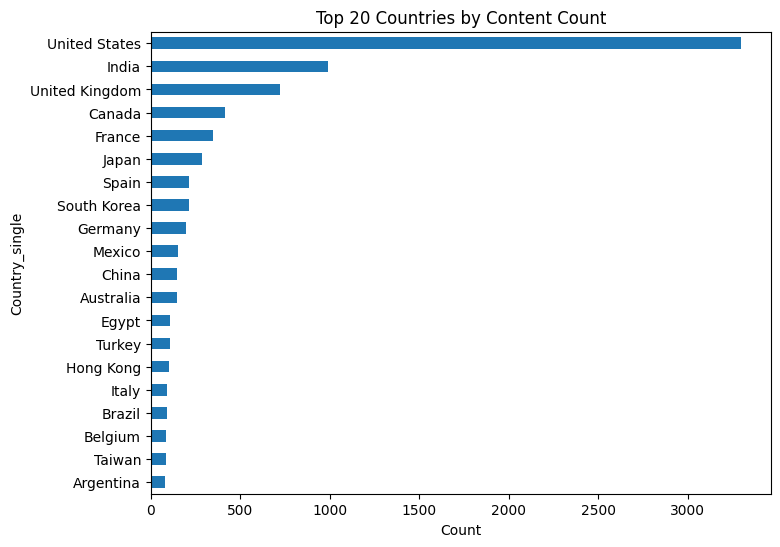

In [10]:
countries = df[['Country']].dropna().copy()
countries['Country_list'] = countries['Country'].str.split(',').apply(lambda lst: [c.strip() for c in lst if c.strip()!=''])
countries = countries.explode('Country_list').rename(columns={'Country_list':'Country_single'})

top_countries = countries['Country_single'].value_counts().head(20)
print(top_countries)

top_countries.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Top 20 Countries by Content Count')
plt.xlabel('Count')
plt.show()

#  **Advanced Analysis**
To go beyond the basics, we also explore:
- Content Growth Trend (total titles per year)
- Ratings Distribution (which ratings dominate Netflix?)
- Duration Analysis (movie length and TV show seasons)
- Top Directors (most frequent contributors)
- Top Actors
- Content Diversity (how many unique countries represented over time)
These deeper insights help understand Netflix’s strategy better.


Year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      24
2015.0      79
2016.0     432
2017.0    1201
2018.0    1661
2019.0    2137
2020.0    2009
2021.0     117
dtype: int64


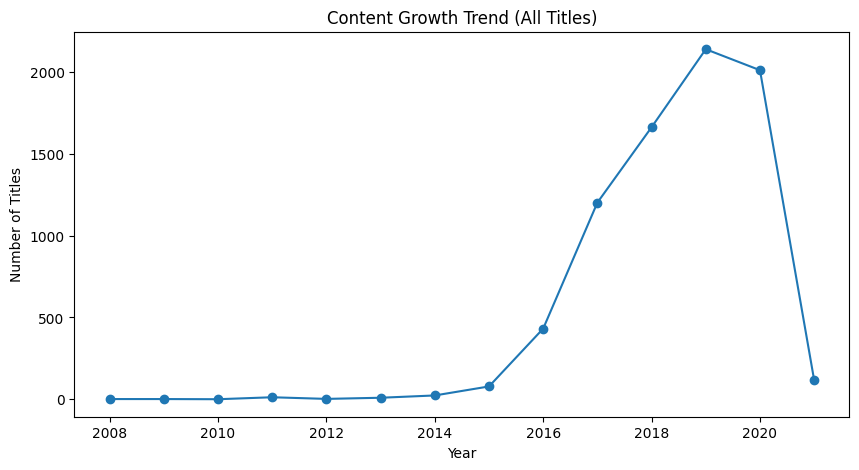

In [11]:
content_growth = df.dropna(subset=['Year']).groupby('Year').size()
print(content_growth)

content_growth.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Content Growth Trend (All Titles)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

Rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


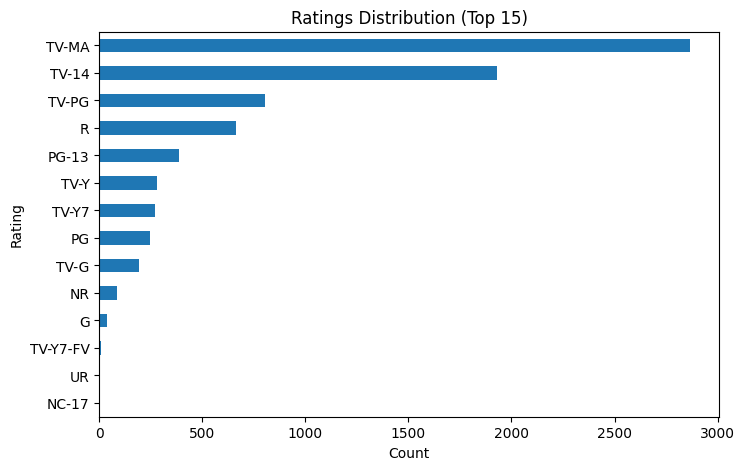

In [12]:
ratings_dist = df['Rating'].value_counts().head(15)
print(ratings_dist)

ratings_dist.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Ratings Distribution (Top 15)')
plt.xlabel('Count')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4072403962.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_movies['Minutes'] = df_movies['Duration'].str.replace(' min','').astype(str).str.extract('(\d+)').astype(float)
/tmp/ipython-input-4072403962.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_tv['Seasons'] = df_tv['Duration'].str.replace(' Season','').str.replace(' Seasons','').astype(str).str.extract('(\d+)').astype(float)


Movie Duration (minutes) Summary:
count    5379.000000
mean       99.306563
std        28.525684
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: Minutes, dtype: float64

TV Show Seasons Summary:
count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: Seasons, dtype: float64


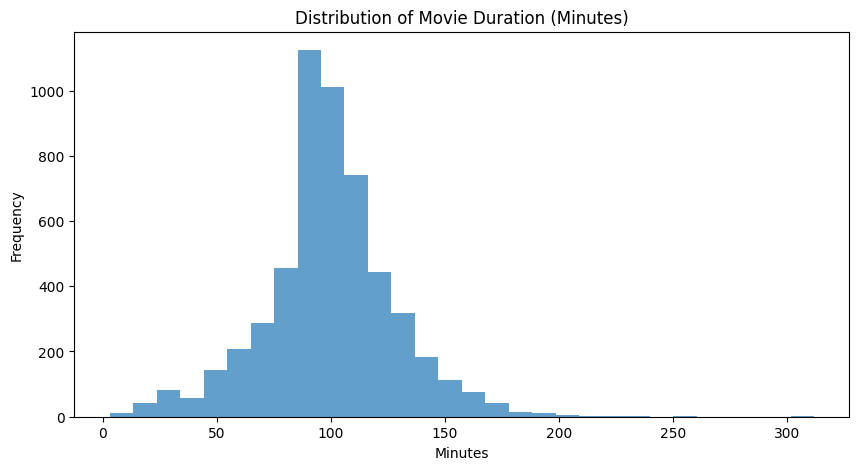

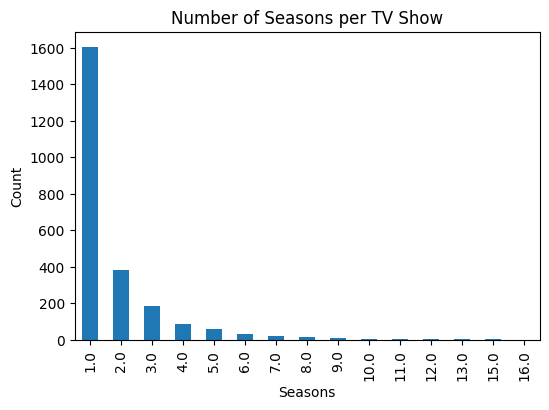

In [13]:
df_movies = df[df['Type'] == 'Movie'].copy()
df_movies['Minutes'] = df_movies['Duration'].str.replace(' min','').astype(str).str.extract('(\d+)').astype(float)

df_tv = df[df['Type'] == 'TV Show'].copy()
df_tv['Seasons'] = df_tv['Duration'].str.replace(' Season','').str.replace(' Seasons','').astype(str).str.extract('(\d+)').astype(float)

print("Movie Duration (minutes) Summary:")
print(df_movies['Minutes'].describe())

print("\nTV Show Seasons Summary:")
print(df_tv['Seasons'].describe())

plt.figure(figsize=(10,5))
df_movies['Minutes'].dropna().plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of Movie Duration (Minutes)')
plt.xlabel('Minutes')
plt.show()

plt.figure(figsize=(6,4))
df_tv['Seasons'].dropna().value_counts().sort_index().plot(kind='bar')
plt.title('Number of Seasons per TV Show')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

Director_list
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       10
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Lance Bangs             8
Ryan Polito             8
Hakan Algül             8
Name: count, dtype: int64


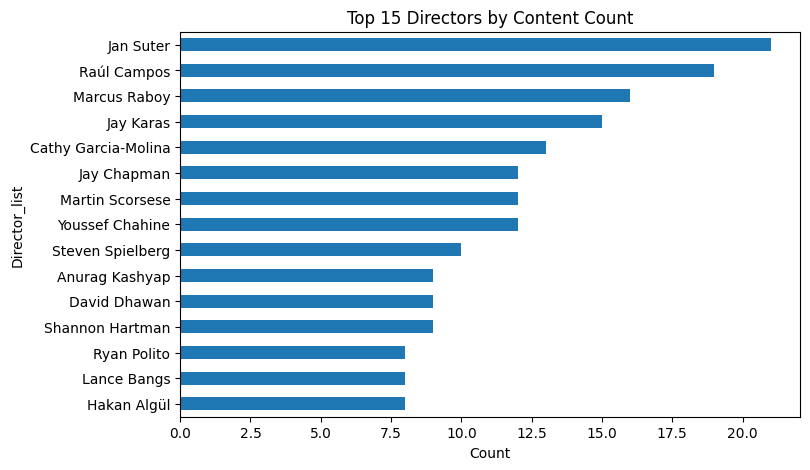

In [14]:
directors = df[['Director']].dropna().copy()
directors['Director_list'] = directors['Director'].str.split(',').apply(lambda lst: [d.strip() for d in lst if d.strip()!=''])
directors = directors.explode('Director_list')
top_directors = directors['Director_list'].value_counts().head(15)
print(top_directors)

top_directors.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Top 15 Directors by Content Count')
plt.xlabel('Count')
plt.show()


Cast_list
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
Akshay Kumar        29
Yuki Kaji           27
Paresh Rawal        27
Amitabh Bachchan    27
Boman Irani         27
Kareena Kapoor      25
Vincent Tong        24
Andrea Libman       24
John Cleese         24
Tara Strong         22
Name: count, dtype: int64


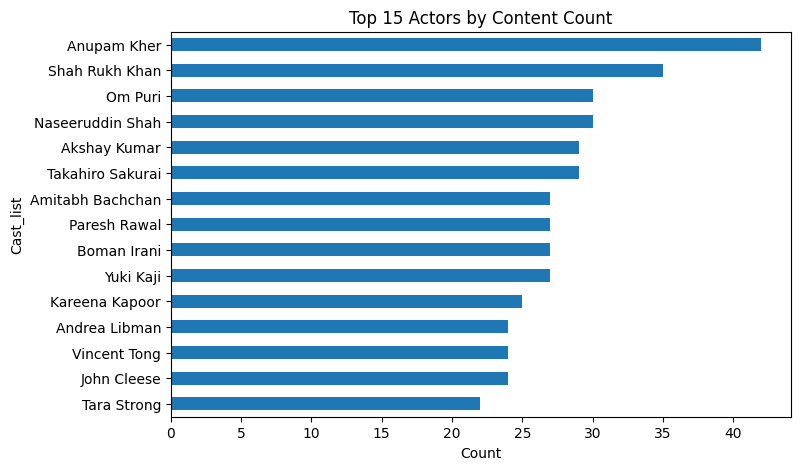

In [15]:
actors = df[['Cast']].dropna().copy()
actors['Cast_list'] = actors['Cast'].str.split(',').apply(lambda lst: [a.strip() for a in lst if a.strip()!=''])
actors = actors.explode('Cast_list')
top_actors = actors['Cast_list'].value_counts().head(15)
print(top_actors)

top_actors.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Top 15 Actors by Content Count')
plt.xlabel('Count')
plt.show()

Year
2008.0     1
2009.0     2
2010.0     1
2011.0     4
2012.0     2
2013.0     4
2014.0     9
2015.0    16
2016.0    52
2017.0    77
2018.0    81
2019.0    73
2020.0    75
2021.0    20
Name: Country_list, dtype: int64


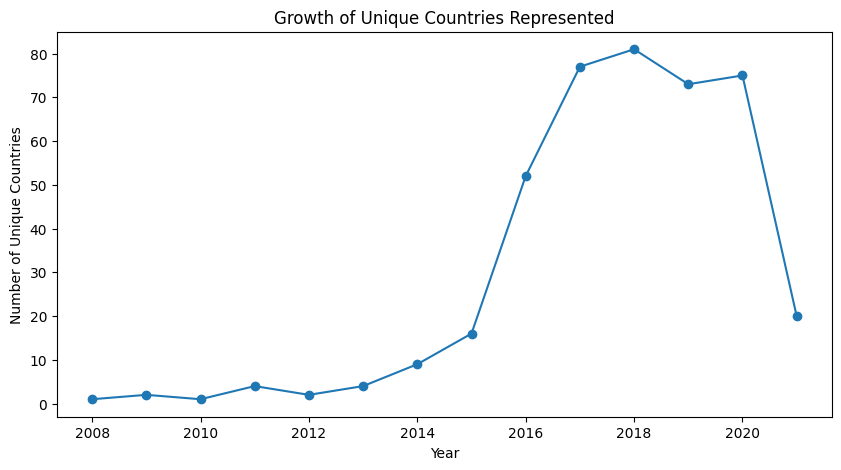

In [16]:
countries_year = df.dropna(subset=['Country','Year']).copy()
countries_year['Country_list'] = countries_year['Country'].str.split(',').apply(lambda lst: [c.strip() for c in lst if c.strip()!=''])
countries_year = countries_year.explode('Country_list')

unique_countries_per_year = countries_year.groupby('Year')['Country_list'].nunique()
print(unique_countries_per_year)

unique_countries_per_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Growth of Unique Countries Represented')
plt.xlabel('Year')
plt.ylabel('Number of Unique Countries')
plt.show()
